# Problem 2a

In [2]:
import numpy as np #numerical computing module
import matplotlib.pyplot as plt #plotting module

from PIL import Image

#when using a notebook, the line below will display any plots directly in it:
%matplotlib inline 

In [3]:
image_file = 'Paolina.tiff'
im = np.array(Image.open(image_file))
im.shape 

(480, 512)

In [4]:
im.min(), im.max()

(43, 255)

In [5]:
im = im.astype('float')/255
im.min(), im.max()

(0.16862745098039217, 1.0)

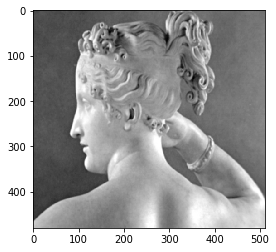

In [6]:
plt.imshow(im, cmap='gray');

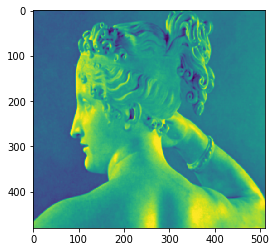

In [7]:
plt.imshow(im, cmap= 'viridis');

# Problem 2b

(0.0, 511.0, 0.0, 479.0)

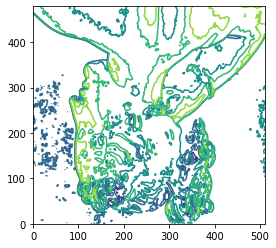

In [18]:
xs, ys = np.meshgrid(np.arange(0, 512),np.arange(0, 480))
plt.contour(xs, ys, im, origin="upper")
plt.axis('image')

Response: The contour function is plotting points along the image that have the same color. If we examine a particular curve and follow its path, we can clearly observe that all points along a particular path have the same color value.

# Problem 2c

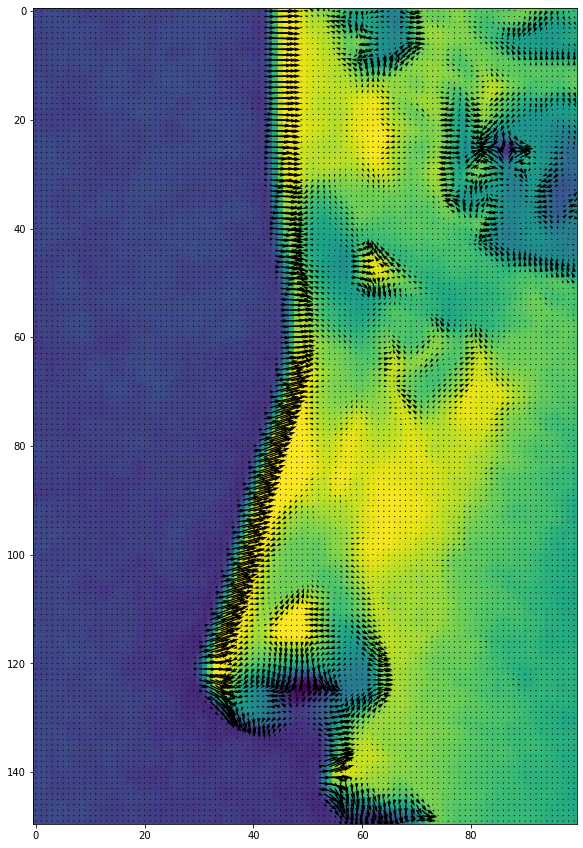

In [22]:
nose = im[150:300,50:150]
xs, ys = np.meshgrid(np.arange(0, 100),np.arange(0,150))
dy, dx = np.gradient(nose)
plt.figure(figsize=(15,15))
plt.imshow(nose)
plt.quiver(xs, ys, dx, dy)
plt.show()

Response: The gradient vectors of the image seem to point from dark(er) regions to bright(er) regions. The lengths of the vector seem to be defined by the magnitude of the difference in brightness or intensity between regions (contrast). From the image above, it is clear that vectors with the greatest lengths are around the edges of the face because the differences in brightness between the face and the background are the most severe while vectors within the face or within the background have much smaller lengths because of the lack of difference in brightness.

# Problem 2d

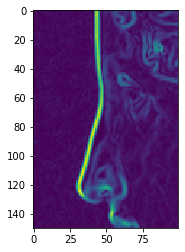

In [17]:
gmag = np.sqrt(np.square(dx) + np.square(dy))
plt.imshow(gmag)

Response: The magitudes of the gradients show us the regions of sharpest contrast (and least contrast). The results of this image are analogous to those of 2c since the length of the gradient vector is equivalent to the magnitude of the gradient. Similar to 2c, the magnitudes of the gradients are greater in areas of greater differences in brightness. They are most amplified (shown as the brightest/greenish points) on the edges of the face due to the sharp contrast with the background while they are least amplified (shown as dark/blackish points) in the background and near the cheeks. The magnitudes of the gradients seem to mapping out a contour of the face based on contrast, unlike the contour function which mapped an outline based on color values.

# Problem 2e

Response: Since our gradient points towards brighter regions, it seems logical to conclude that brightness should determine the amount of "food" if we used the Paolina image (i.e. higher brightness = higher concentration of food). A potential initial position for the A. coli can be anywhere near the edges of the face but in the background (ex. a point just outside the tip of the nose). Assuming that we use optimal parameters found in part 1 (high rttp, low ttrp such as 0.9 and 0.1 respectively), the A. coli would tumble and loop around the background for a bit until it reaches the edge of the face, which has the greatest gradient. It will eventually loop its way to the inside face and tumble around near the edge. It might loop further into the face or it might slightly leave the edge. However, it will bounce back into the face due to the sharp gradient along the edge of the face. An important fact to note is that the A. coli will be constantly looping due to our rttp and ttrp values.